In [1]:
import numpy as np
import pandas as pd

In [2]:
train_df = pd.read_csv('train_dataset_hackathon_mkb.csv', sep=';', encoding='cp1251')
train_df

,id_contract,id_client,SIGN_DATE,IP_flag,TARGET,F1100,F1110,F1150,F1160,F1170,...,WINNERNUMBER_95_EVER,SIGNEDNUMBER_95_EVER,SUM_95_EVER,FLAG_DISQUALIFICATION,COUNT_CHANGE_YEAR,COUNT_CHANGE_EVER,BIRTHDATE,AGE,SEX_NAME,CITIZENSHIP_NAME
0,1,1847,01JAN2018:00:00:00,0,0,1.298961e+09,2154000.0,1.125573e+09,NaN,150010000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,4650,01JAN2018:00:00:00,1,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,4770,01JAN2018:00:00:00,0,0,7.337400e+07,NaN,7.337400e+07,NaN,NaN,...,169.0,168.0,18351739.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN
3,4,12237,01JAN2018:00:00:00,0,0,1.937488e+09,122828000.0,6.103280e+08,NaN,809426000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,9988,01JAN2018:00:00:00,1,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17886,17887,3439,07APR2019:00:00:00,0,0,5.404500e+07,NaN,5.404500e+07,NaN,NaN,...,382.0,381.0,45954226.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN
17887,17888,838,08APR2019:00:00:00,0,0,NaN,NaN,NaN,NaN,NaN,...,193.0,184.0,134417510.0,NaN,NaN,5.0,NaN,NaN,NaN,NaN
17888,17889,10537,08APR2019:00:00:00,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17889,17890,1751,08APR2019:00:00:00,0,1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
test_df = pd.read_csv('test_dataset_hackathon_mkb.csv', sep=';', encoding='cp1251')
test_df.head()

,id_contract,id_client,SIGN_DATE,IP_flag,F1100,F1110,F1150,F1160,F1170,F1180,...,WINNERNUMBER_95_EVER,SIGNEDNUMBER_95_EVER,SUM_95_EVER,FLAG_DISQUALIFICATION,COUNT_CHANGE_YEAR,COUNT_CHANGE_EVER,BIRTHDATE,AGE,SEX_NAME,CITIZENSHIP_NAME
0,17892,3620,08APR2019:00:00:00,1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,17893,4101,08APR2019:00:00:00,0,1906000.0,NaN,1906000.0,NaN,NaN,NaN,...,7439.0,7100.0,1.187411e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,17894,9589,08APR2019:00:00:00,0,147000.0,NaN,147000.0,NaN,NaN,NaN,...,362.0,344.0,9.836260e+07,NaN,1.0,3.0,NaN,NaN,NaN,NaN
3,17895,11546,08APR2019:00:00:00,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,17896,12558,08APR2019:00:00:00,0,26000.0,NaN,NaN,NaN,26000.0,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN


In [4]:
train_df.dtypes

id_contract            int64
id_client              int64
SIGN_DATE             object
IP_flag                int64
TARGET                 int64
                      ...   
COUNT_CHANGE_EVER    float64
BIRTHDATE             object
AGE                  float64
SEX_NAME              object
CITIZENSHIP_NAME      object
Length: 124, dtype: object

In [5]:
train_df.describe()

,id_contract,id_client,IP_flag,TARGET,F1100,F1110,F1150,F1160,F1170,F1180,...,SUM_95_YEAR,ADMITTEDNUMBER_95_EVER,NOTADMITTEDNUMBER_EVER,WINNERNUMBER_95_EVER,SIGNEDNUMBER_95_EVER,SUM_95_EVER,FLAG_DISQUALIFICATION,COUNT_CHANGE_YEAR,COUNT_CHANGE_EVER,AGE
count,17891.000000,17891.000000,17891.000000,17891.000000,6.936000e+03,1.420000e+03,6.341000e+03,3.460000e+02,1.499000e+03,2.500000e+03,...,6.331000e+03,6784.000000,6784.000000,6784.000000,6784.000000,6.784000e+03,5.0,239.000000,1509.000000,1419.000000
mean,8946.000000,6630.652786,0.195629,0.413001,3.184582e+09,1.136357e+08,2.287078e+09,4.981780e+07,3.389027e+09,1.341100e+08,...,1.112049e+08,651.184699,16.176739,354.557341,323.424823,2.544790e+08,1.0,1.502092,2.325381,41.916843
std,5164.831169,3659.132885,0.396695,0.492387,3.062184e+10,9.413832e+08,2.016291e+10,2.561433e+08,2.076766e+10,6.466805e+08,...,5.293399e+08,2552.512856,50.684059,1339.773863,1258.815709,1.140965e+09,0.0,1.511509,2.316937,10.769157
min,1.000000,1.000000,0.000000,0.000000,-1.820000e+05,1.000000e+03,1.000000e+03,-1.175000e+06,1.000000e+03,-2.540000e+05,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.0,1.000000,1.000000,21.000000
25%,4473.500000,3452.000000,0.000000,0.000000,4.335000e+05,7.300000e+04,7.180000e+05,3.694000e+06,1.130000e+05,1.720000e+05,...,1.418006e+06,35.000000,0.000000,17.000000,12.000000,4.296130e+06,1.0,1.000000,1.000000,32.000000
50%,8946.000000,6560.000000,0.000000,0.000000,4.308000e+06,2.760000e+05,4.984000e+06,3.694000e+06,7.239000e+06,3.907000e+06,...,7.371221e+06,136.000000,3.000000,75.000000,58.000000,1.865707e+07,1.0,1.000000,2.000000,40.000000
75%,13418.500000,10080.000000,0.000000,1.000000,6.661650e+07,4.409500e+06,5.594400e+07,1.195650e+07,1.485000e+08,4.848200e+07,...,3.373519e+07,443.000000,10.000000,219.250000,176.250000,9.359097e+07,1.0,2.000000,2.000000,49.000000
max,17891.000000,12735.000000,1.000000,1.000000,1.250774e+12,1.342100e+10,8.783281e+11,2.989645e+09,2.833230e+11,1.390180e+10,...,4.946254e+09,51040.000000,809.000000,24749.000000,22821.000000,3.813102e+10,1.0,13.000000,25.000000,78.000000


<AxesSubplot:>

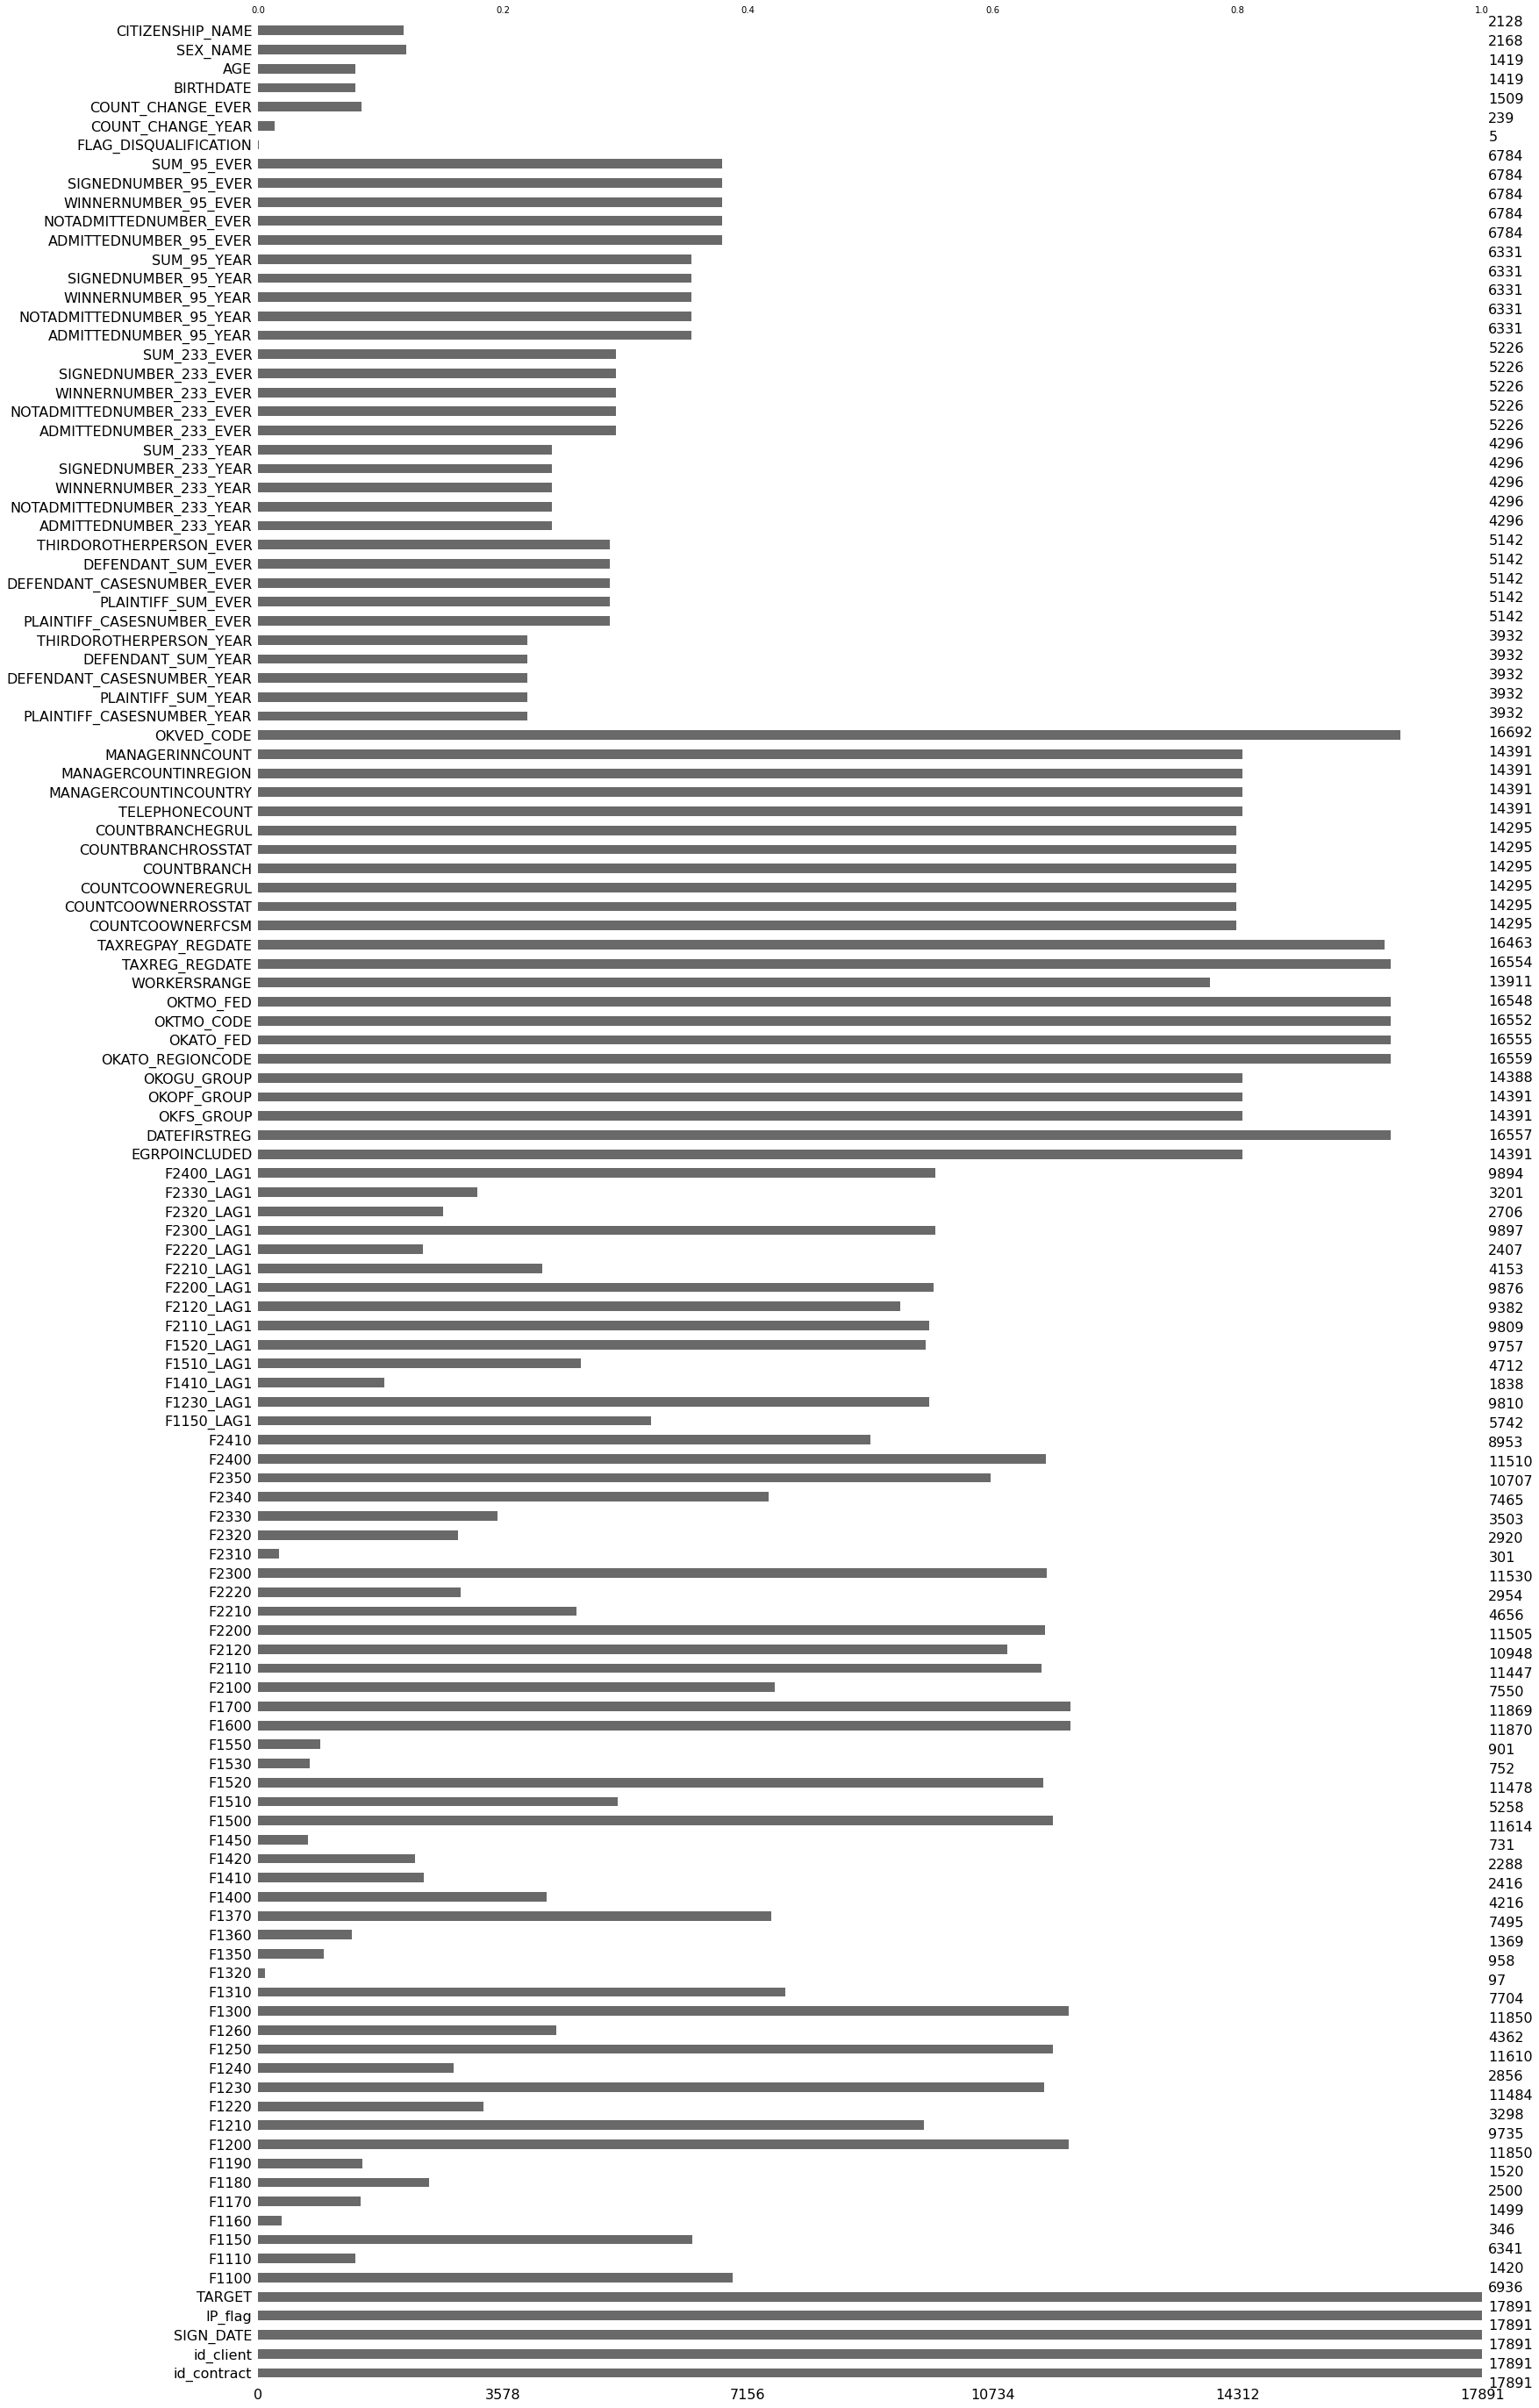

In [8]:
import missingno as msno
msno.bar(train_df)

<AxesSubplot:>

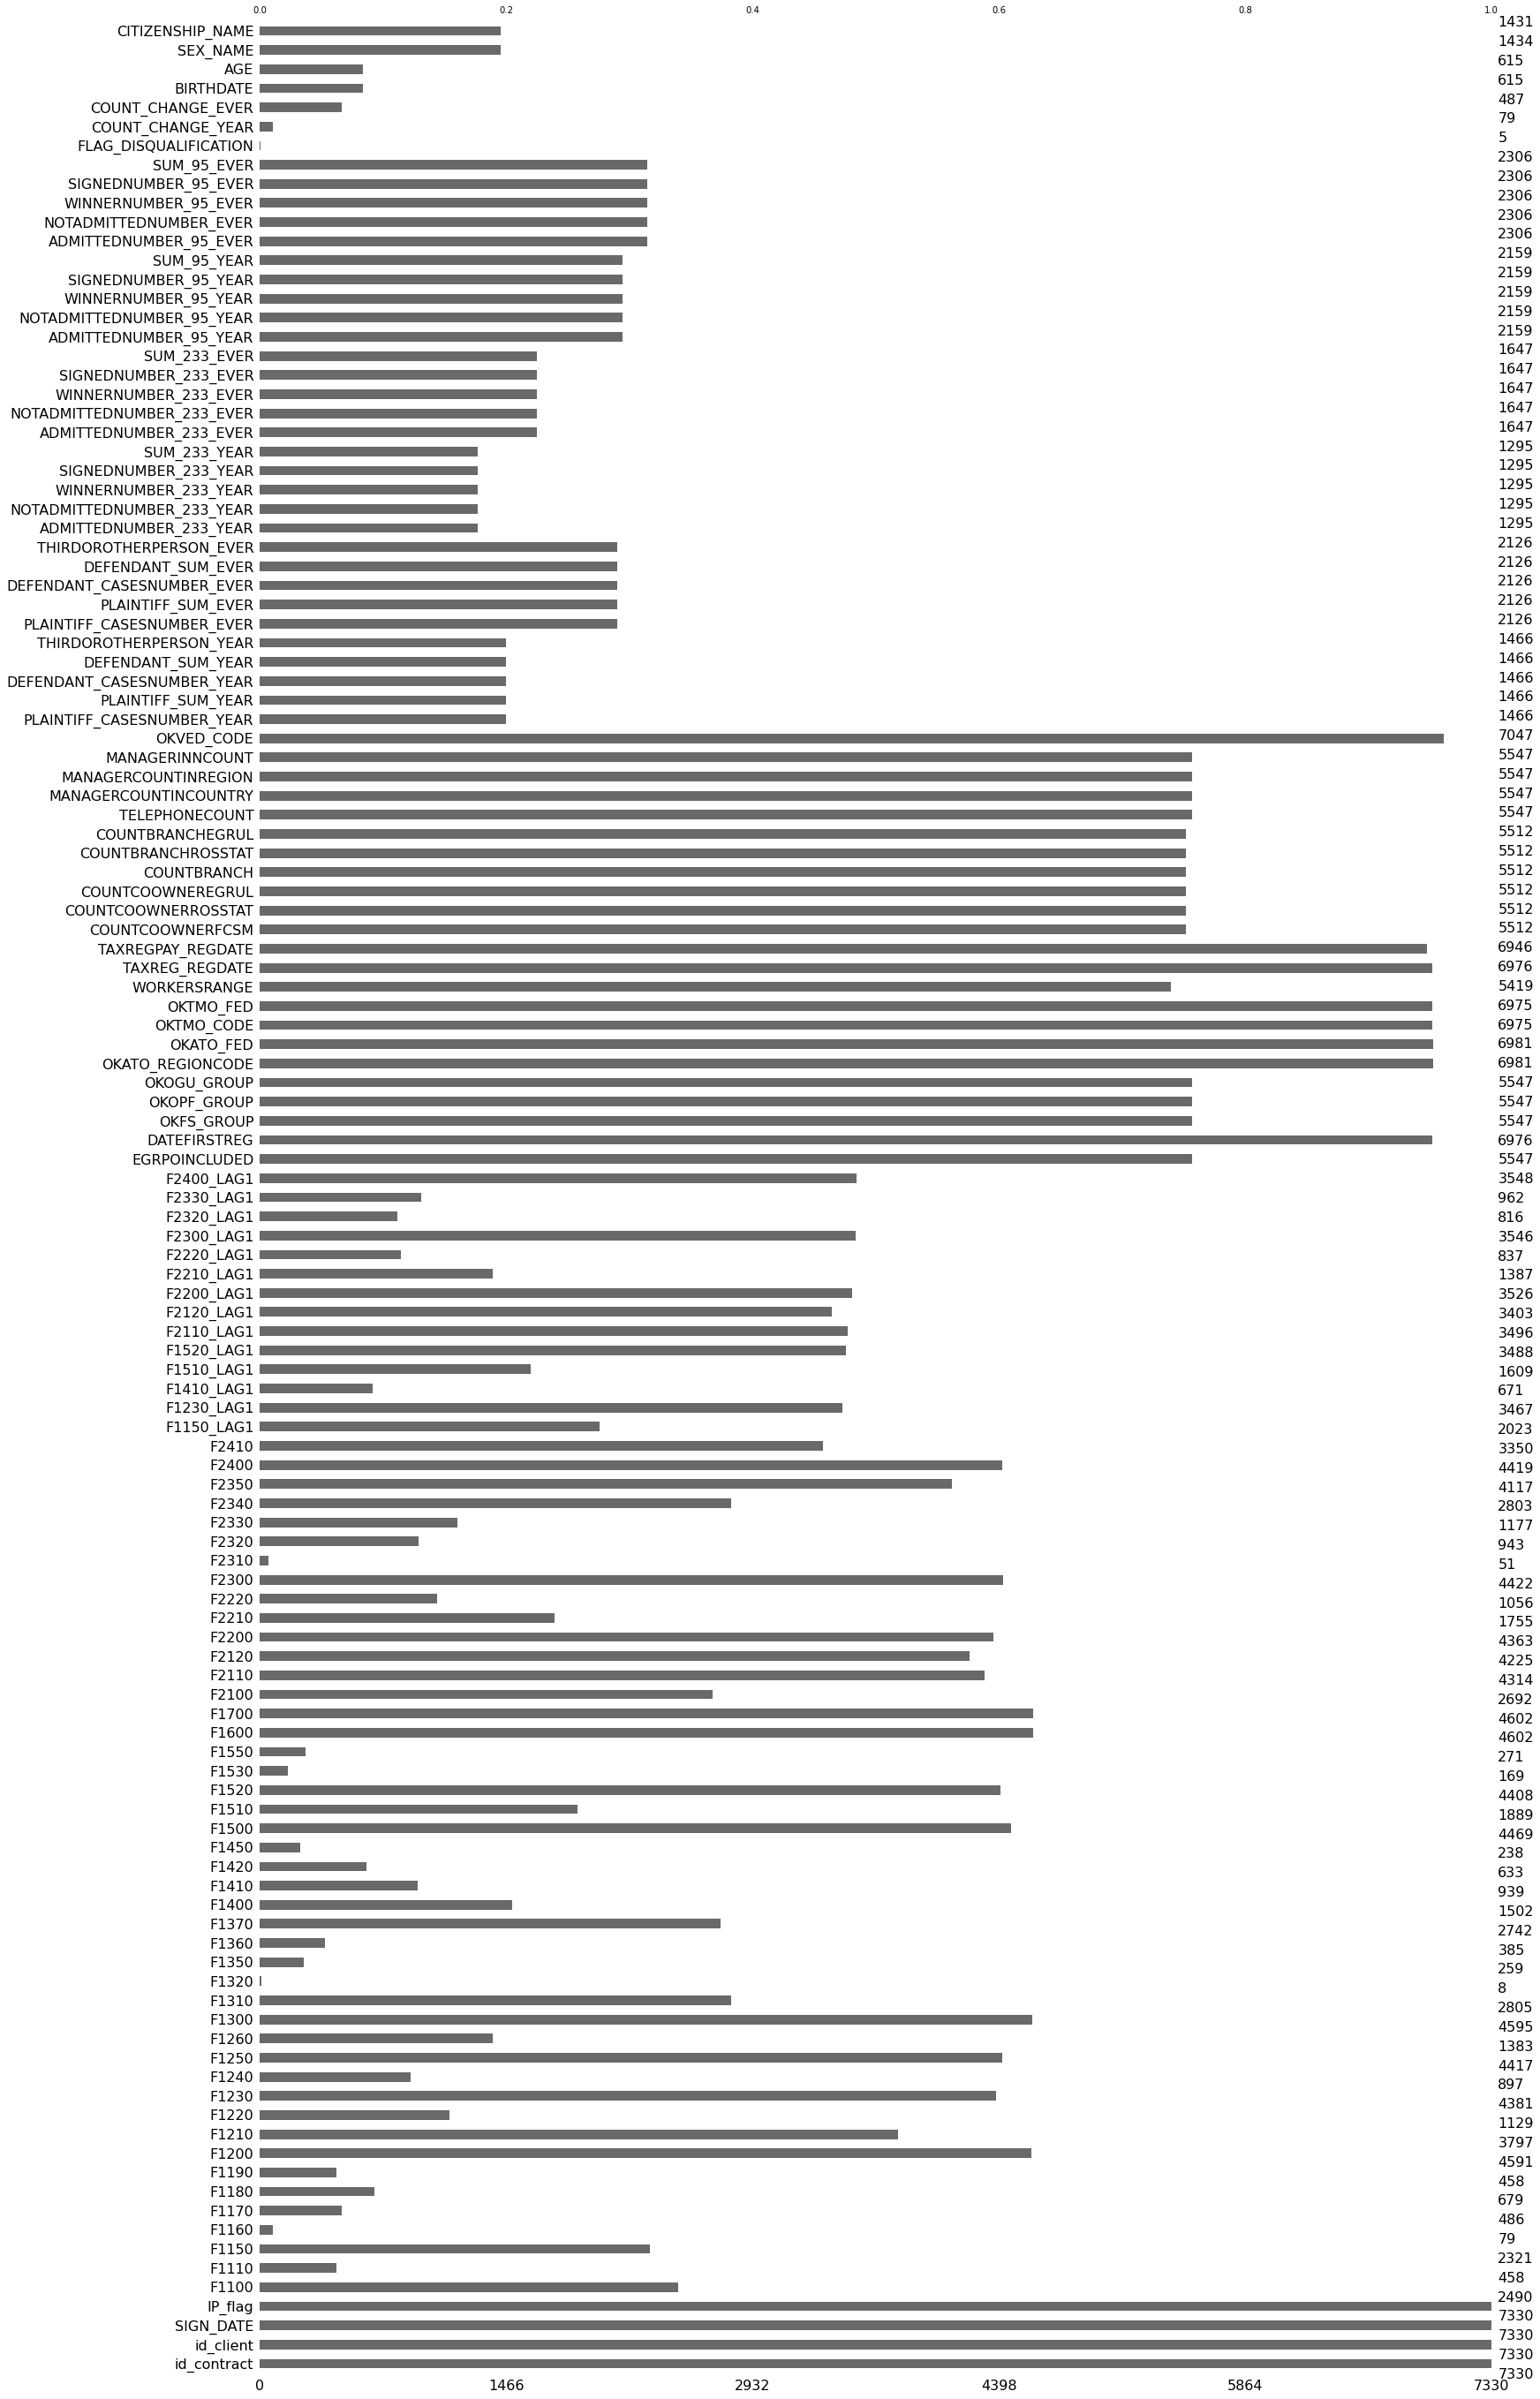

In [7]:
msno.bar(test_df)

In [9]:
drop_col = ['CITIZENSHIP_NAME', 'SEX_NAME', 'BIRTHDATE', 'id_contract', 'id_client', 'SIGN_DATE', 'AGE',
           'TAXREG_REGDATE', 'TAXREGPAY_REGDATE', 'DATEFIRSTREG', 'OKVED_CODE', 'OKATO_REGIONCODE', 'OKATO_FED', 
            'OKTMO_CODE', 'OKTMO_FED', 'COUNT_CHANGE_EVER', 'FLAG_DISQUALIFICATION', 'COUNT_CHANGE_YEAR', 'F2320_LAG1',
            'F2330_LAG1', 'F2220_LAG1', 'F1410_LAG1','F2310', 'F2320', 'F2330', 'F2220', 'F1530', 'F1550', 
            'F1400', 'F1410', 'F1420', 'F1450', 'F1320', 'F1350', 'F1360', 'F1220', 'F1240', 'F1160', 'F1170', 
            'F1180', 'F1190', 'F1110']
text_col = ['OKFS_GROUP','OKOPF_GROUP','OKOGU_GROUP','WORKERSRANGE']

features_cols = train_df.drop(drop_col, axis='columns').select_dtypes(include=[np.number]).columns.tolist()


X = train_df.drop(drop_col, axis=1).drop(['TARGET'], axis=1)
y = train_df['TARGET']
test = test_df.drop(drop_col, axis=1)

In [10]:
X[text_col] = X[text_col].fillna('no')
test[text_col] = test[text_col].fillna('no')
X = X.fillna(0)
test = test.fillna(0)

In [16]:
# Используем для кодирования категориальных столбцов метод OrdinalEncoder из sklearn
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
X[text_col] = ordinal_encoder.fit_transform(X[text_col])
test[text_col] = ordinal_encoder.fit_transform(test[text_col])

In [8]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X[list_sum] = ss.fit_transform(X[list_sum])
test[list_sum] = ss.transform(test[list_sum])

In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=17)
#rfc.fit(train_df[features_cols_1].fillna(0), train_df[lable_col])

In [17]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
max_features = ['log2', 'sqrt']
max_depth = [int(x) for x in np.linspace(start = 1, stop = 15, num = 15)]
min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
min_samples_leaf = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
bootstrap = [True, False]
param_dist = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
rs = RandomizedSearchCV(rfc, 
                        param_dist, 
                        n_iter = 500, 
                        cv = 10, 
                        verbose = 1, 
                        n_jobs=-1, 
                        random_state=17)
rs.fit(X, y)
rs.best_params_

Fitting 10 folds for each of 500 candidates, totalling 5000 fits


{'n_estimators': 200,
 'min_samples_split': 12,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 15,
 'bootstrap': True}

In [18]:
rs_df = pd.DataFrame(rs.cv_results_).sort_values('rank_test_score').reset_index(drop=True)
rs_df = rs_df.drop([
            'mean_fit_time', 
            'std_fit_time', 
            'mean_score_time',
            'std_score_time', 
            'params', 
            'split0_test_score', 
            'split1_test_score', 
            'split2_test_score', 
            'std_test_score'],
            axis=1)
rs_df.head(10)

,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_bootstrap,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,rank_test_score
0,200,12,2,sqrt,15,True,0.847960,0.842370,0.802683,0.864729,0.833426,0.833426,0.807714,0.833324,1
1,1000,2,2,log2,14,True,0.842370,0.837898,0.803242,0.861375,0.830632,0.831191,0.800447,0.831032,2
2,300,12,2,log2,13,False,0.840134,0.834544,0.801006,0.858021,0.831191,0.825601,0.802124,0.829523,3
3,1000,12,2,sqrt,13,True,0.845165,0.835662,0.799329,0.861934,0.832868,0.827837,0.799888,0.828461,4
4,900,50,2,sqrt,14,False,0.841252,0.833985,0.802683,0.860257,0.832309,0.825042,0.798770,0.826337,5
5,900,34,2,sqrt,12,False,0.840134,0.829514,0.799329,0.854667,0.821129,0.824483,0.799329,0.826058,6
6,500,23,2,log2,12,False,0.836780,0.831191,0.792063,0.852990,0.823365,0.826160,0.797093,0.824884,7
7,600,12,2,sqrt,12,True,0.841811,0.832868,0.794298,0.856344,0.824483,0.825601,0.798770,0.824436,8
8,400,7,2,sqrt,10,False,0.830073,0.825601,0.801565,0.847401,0.822806,0.823924,0.801565,0.823710,9
9,400,23,2,sqrt,11,False,0.834544,0.825042,0.794857,0.849078,0.820011,0.823365,0.797093,0.823151,10


In [19]:
n_estimators = [200,600,900,1000]
max_features = ['sqrt','log2']
max_depth = [13,14,15]
min_samples_split = [2,12,50]
min_samples_leaf = [2]
bootstrap = [False,True]
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
gs = GridSearchCV(rfc, param_grid, cv = 5, verbose = 1, n_jobs=-1)
gs.fit(X, y)
#rfc_3 = gs.best_estimator_
gs.best_params_

Fitting 5 folds for each of 144 candidates, totalling 720 fits


{'bootstrap': False,
 'max_depth': 15,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 200}

In [21]:
rfc_3 = gs.best_estimator_
rfc_3.fit(X, y)

RandomForestClassifier(bootstrap=False, max_depth=15, max_features='sqrt',
                       min_samples_leaf=2, n_estimators=200, random_state=17)

In [22]:
test_df['TARGET'] = rfc_3.predict_proba(test)[:, 1]

test_df[['id_contract', 'TARGET']].to_csv('submit_file_rfc_gs.csv', sep=';', index=False)
test_df[['id_contract', 'TARGET']].head()

,id_contract,TARGET
0,17892,0.312870
1,17893,0.131527
2,17894,0.232797
3,17895,0.276178
4,17896,0.701953


### Catboost

In [23]:
df_cat_train = pd.read_csv('train_dataset_hackathon_mkb.csv', sep=';', encoding='cp1251')
df_cat_test = pd.read_csv('test_dataset_hackathon_mkb.csv', sep=';', encoding='cp1251')

In [24]:
drop_col_cat = ['CITIZENSHIP_NAME', 'SEX_NAME', 'BIRTHDATE', 'id_contract', 'id_client', 'SIGN_DATE',
                 'TAXREG_REGDATE', 'TAXREGPAY_REGDATE', 'DATEFIRSTREG','OKVED_CODE', 'OKATO_REGIONCODE', 'OKATO_FED',
                'OKTMO_CODE','OKTMO_FED']

X_cat = df_cat_train.drop(drop_col_cat, axis=1).drop(['TARGET'], axis=1)
y_cat = df_cat_train['TARGET']
test_cat = df_cat_test.drop(drop_col_cat, axis=1)

In [25]:
text_col = ['OKFS_GROUP','OKOPF_GROUP','OKOGU_GROUP','WORKERSRANGE']
X_cat[text_col] = X_cat[text_col].fillna('no')
test_cat[text_col] = test_cat[text_col].fillna('no')

In [26]:
X_cat[['EGRPOINCLUDED','FLAG_DISQUALIFICATION']] = X_cat[['EGRPOINCLUDED','FLAG_DISQUALIFICATION']].fillna(0).astype(int)

In [27]:
cat_features = ['IP_flag','EGRPOINCLUDED', 'OKFS_GROUP', 'OKOPF_GROUP', 'OKOGU_GROUP', 'WORKERSRANGE', 'FLAG_DISQUALIFICATION']
index_cat = [X_cat.columns.get_loc(i) for i in cat_features if i in X_cat]
index_cat

[0, 60, 61, 62, 63, 64, 105]

In [28]:
from catboost import CatBoostClassifier, Pool

pool = Pool(data=X_cat, label=y_cat, cat_features=cat_features)

In [30]:
cbc = CatBoostClassifier(bagging_temperature=1,
                         random_strength=1,
                         iterations=1500,
                         l2_leaf_reg = 3,
                         learning_rate = 0.01,
                         random_seed=17,
                         custom_loss='AUC',
                        one_hot_max_size=7,
                        leaf_estimation_method='Newton',
                        text_features=text_col,
                        nan_mode='Min', c)

# train the model
cbc.fit(X_cat, y_cat, cat_features=cat_features, verbose=150)

0:	learn: 0.6888237	total: 14.8ms	remaining: 22.2s
150:	learn: 0.4691713	total: 1.89s	remaining: 16.9s
300:	learn: 0.4263612	total: 3.63s	remaining: 14.5s
450:	learn: 0.4004873	total: 5.51s	remaining: 12.8s
600:	learn: 0.3816956	total: 7.35s	remaining: 11s
750:	learn: 0.3665783	total: 9.15s	remaining: 9.12s
900:	learn: 0.3540249	total: 11s	remaining: 7.29s
1050:	learn: 0.3421607	total: 12.8s	remaining: 5.46s
1200:	learn: 0.3318964	total: 14.5s	remaining: 3.61s
1350:	learn: 0.3219948	total: 16.3s	remaining: 1.79s
1499:	learn: 0.3125212	total: 18s	remaining: 0us


In [31]:
test_cat[['EGRPOINCLUDED','FLAG_DISQUALIFICATION']] = test_cat[['EGRPOINCLUDED','FLAG_DISQUALIFICATION']].fillna(0).astype(int)

In [32]:
df_cat_test['TARGET'] = cbc.predict_proba(test_cat)[:, 1]

df_cat_test[['id_contract', 'TARGET']].to_csv('submit_file_cat.csv', sep=';', index=False)
df_cat_test[['id_contract', 'TARGET']].head()

,id_contract,TARGET
0,17892,0.291760
1,17893,0.025694
2,17894,0.191123
3,17895,0.394824
4,17896,0.523756


In [10]:
from catboost import cv

params = {}
params['loss_function'] = 'Logloss'
params['iterations'] = 3000
params['custom_loss'] = 'AUC'
params['random_seed'] = 17
params['learning_rate'] = 0.01

cv_data = cv(params=params, 
            pool = pool,
            fold_count=10,
            shuffle=True,
            partition_random_seed=0,
            plot=True,
            stratified=True,
            verbose=False,
             return_models=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/10]

bestTest = 0.3264003425
bestIteration = 2999

Training on fold [1/10]

bestTest = 0.315838391
bestIteration = 2999

Training on fold [2/10]

bestTest = 0.3191911478
bestIteration = 2999

Training on fold [3/10]

bestTest = 0.3315805364
bestIteration = 2999

Training on fold [4/10]

bestTest = 0.3127567191
bestIteration = 2997

Training on fold [5/10]

bestTest = 0.3183155878
bestIteration = 2999

Training on fold [6/10]

bestTest = 0.3363959396
bestIteration = 2999

Training on fold [7/10]

bestTest = 0.3317114361
bestIteration = 2998

Training on fold [8/10]

bestTest = 0.3204554196
bestIteration = 2999

Training on fold [9/10]

bestTest = 0.3363908191
bestIteration = 2997

